<a href="https://colab.research.google.com/github/SumitTade74/SumitTade74/blob/main/Faults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steel Plate Faults: Explanation of Fault Types and Features
Fault Types
1. Pastry
Small patches or irregularities on the surface of the steel plate, typically caused by imperfections in the manufacturing process or mishandling during transport. These imperfections affect the surface smoothness and appearance.

2. Z_Scratch
Narrow scratches or marks running parallel to the rolling direction of the steel plate. These scratches can result from handling, machining, or contact with abrasive materials during production or transportation.

3. K_Scratch
Similar to Z-scratches, but running perpendicular to the rolling direction. These can be caused by handling, machining, or contact with abrasive materials during the manufacturing or transportation process.

4. Stains
Discolored or contaminated areas on the surface of the steel plate. Stains may result from rust, oil, grease, or other foreign substances that come into contact with the steel surface during processing, storage, or handling.

5. Dirtiness
Presence of dirt or particulate matter on the steel plate's surface. This may include debris, dust, or contaminants accumulated during manufacturing, handling, or storage.

6. Bumps
Raised or protruding areas on the surface of the steel plate. These can be caused by irregularities in the manufacturing process (e.g., uneven rolling or cooling) or physical damage during handling or transportation.

7. Other_Faults
This category includes various surface imperfections, irregularities, or abnormalities not explicitly categorized in the other fault types. It encompasses a broad range of minor defects affecting the quality or usability of the steel plate.

Dataset Features
1. Location Features
X_Minimum – Minimum x-coordinate of the fault.
X_Maximum – Maximum x-coordinate of the fault.
Y_Minimum – Minimum y-coordinate of the fault.
Y_Maximum – Maximum y-coordinate of the fault.
2. Size Features
Pixels_Areas – Area of the fault in pixels.
X_Perimeter – Perimeter along the x-axis of the fault.
Y_Perimeter – Perimeter along the y-axis of the fault.
3. Luminosity Features
Sum_of_Luminosity – Total luminosity in the fault area.
Minimum_of_Luminosity – Minimum luminosity value in the fault area.
Maximum_of_Luminosity – Maximum luminosity value in the fault area.
4. Material and Index Features
TypeOfSteel_A300 – Indicates if the steel type is A300.
TypeOfSteel_A400 – Indicates if the steel type is A400.
Steel_Plate_Thickness – Thickness of the steel plate.
Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index – Various index values related to edges and geometry.
5. Logarithmic Features
LogOfAreas – Logarithm of the fault's area.
Log_X_Index, Log_Y_Index – Logarithmic indices related to x and y coordinates.
6. Statistical Features
Orientation_Index – Describes the orientation of the fault.
Luminosity_Index – Index related to luminosity.
SigmoidOfAreas – Sigmoid function applied to the fault's area.

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd

Importing the dataset

In [ ]:
df = pd.read_csv('faults.csv')
X = df.iloc[:, :-7].values
y = df.iloc[:, -7:].values

In [ ]:
# import pandas as pd
# import numpy as np

# # Load dataset
# df = pd.read_csv("faults.csv")

# # Create a new DataFrame with 6 aggregated features
# df_reduced = pd.DataFrame()

# # 1. **Location Features** (Aggregating min/max coordinates)
# df_reduced["Location_Feature"] = df[["X_Minimum", "X_Maximum", "Y_Minimum", "Y_Maximum"]].mean(axis=1)

# # 2. **Size Features** (Combining area and perimeter)
# df_reduced["Size_Feature"] = df[["Pixels_Areas", "X_Perimeter", "Y_Perimeter"]].sum(axis=1)

# # 3. **Luminosity Features** (Summarizing min, max, and total luminosity)
# df_reduced["Luminosity_Feature"] = df[["Sum_of_Luminosity", "Minimum_of_Luminosity", "Maximum_of_Luminosity"]].mean(axis=1)

# # 4. **Material and Index Features** (Steel type & edge indices combined)
# df_reduced["Material_Feature"] = df[["TypeOfSteel_A300", "TypeOfSteel_A400", "Steel_Plate_Thickness",
#                                      "Edges_Index", "Empty_Index", "Square_Index", "Outside_X_Index",
#                                      "Edges_X_Index", "Edges_Y_Index", "Outside_Global_Index"]].sum(axis=1)

# # 5. **Logarithmic Features** (Log transform of area & perimeter)
# df_reduced["Log_Feature"] = np.log1p(df[["Pixels_Areas", "X_Perimeter", "Y_Perimeter"]].sum(axis=1))

# # 6. **Statistical Features** (Index transformations)
# df_reduced["Statistical_Feature"] = df[["Orientation_Index", "Luminosity_Index"]].mean(axis=1)

# # Save the transformed dataset
# df_reduced.to_csv("faults_reduced.csv", index=False)

# print("Feature reduction complete. Saved as 'faults_reduced.csv'.")
# print(df_reduced.head())




In [ ]:

epsilon = 1e-6
df_reduced = pd.DataFrame()

# Location Features
df_reduced['X_Distance'] = df['X_Maximum'] - df['X_Minimum']
df_reduced['Y_Distance'] = df['Y_Maximum'] - df['Y_Minimum']

# Density Feature
df_reduced['Density'] = df['Pixels_Areas'] / (df['X_Perimeter'] + df['Y_Perimeter'])

# Relative Perimeter Feature
df_reduced['Relative_Perimeter'] = df['X_Perimeter'] / (df['X_Perimeter'] + df['Y_Perimeter'] + epsilon)

# Circularity Feature
df_reduced['Circularity'] = df['Pixels_Areas'] / (df['X_Perimeter'] ** 2)

# Symmetry Index Feature
df_reduced['Symmetry_Index'] = np.abs(df_reduced['X_Distance'] - df_reduced['Y_Distance']) / (df_reduced['X_Distance'] + df_reduced['Y_Distance'] + epsilon)

# Color Contrast Feature
df_reduced['Color_Contrast'] = df['Maximum_of_Luminosity'] - df['Minimum_of_Luminosity']

# Combined Geometric Index Feature
df_reduced['Combined_Geometric_Index'] = df['Edges_Index'] * df['Square_Index']

# Interaction Term Feature
df_reduced['X_Distance*Pixels_Areas'] = df_reduced['X_Distance'] * df['Pixels_Areas']

# Additional Features
df_reduced['sin_orientation'] = np.sin(df['Orientation_Index'])
df_reduced['Edges_Index2'] = np.exp(df['Edges_Index'] + epsilon)
df_reduced['X_Maximum2'] = np.sin(df['X_Maximum'])
df_reduced['Y_Minimum2'] = np.sin(df['Y_Minimum'])
df_reduced['Aspect_Ratio_Pixels'] = np.where(df['Y_Perimeter'] == 0, 0, df['X_Perimeter'] / df['Y_Perimeter'])
df_reduced['Aspect_Ratio'] = np.where(df_reduced['Y_Distance'] == 0, 0, df_reduced['X_Distance'] / df_reduced['Y_Distance'])

# Average Luminosity Feature
df_reduced['Average_Luminosity'] = (df['Sum_of_Luminosity'] + df['Minimum_of_Luminosity']) / 2

# Normalized Steel Thickness Feature
df_reduced['Normalized_Steel_Thickness'] = (df['Steel_Plate_Thickness'] - df['Steel_Plate_Thickness'].min()) / (df['Steel_Plate_Thickness'].max() - df['Steel_Plate_Thickness'].min())

# Logarithmic Features
df_reduced['Log_Perimeter'] = np.log(df['X_Perimeter'] + df['Y_Perimeter'] + epsilon)
df_reduced['Log_Luminosity'] = np.log(df['Sum_of_Luminosity'] + epsilon)
df_reduced['Log_Aspect_Ratio'] = np.log(df_reduced['Aspect_Ratio'] ** 2 + epsilon)

# Statistical Features
df_reduced['Combined_Index'] = df['Orientation_Index'] * df['Luminosity_Index']
df_reduced['Sigmoid_Areas'] = 1 / (1 + np.exp(-df['LogOfAreas'] + epsilon))

#return df_reduced

#train = Preprocess().fit_transform(train)
#test = Preprocess().fit_transform(test)
#train.head()

In [ ]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X_Distance                  1941 non-null   int64  
 1   Y_Distance                  1941 non-null   int64  
 2   Density                     1941 non-null   float64
 3   Relative_Perimeter          1941 non-null   float64
 4   Circularity                 1941 non-null   float64
 5   Symmetry_Index              1941 non-null   float64
 6   Color_Contrast              1941 non-null   int64  
 7   Combined_Geometric_Index    1941 non-null   float64
 8   X_Distance*Pixels_Areas     1941 non-null   int64  
 9   sin_orientation             1941 non-null   float64
 10  Edges_Index2                1941 non-null   float64
 11  X_Maximum2                  1941 non-null   float64
 12  Y_Minimum2                  1941 non-null   float64
 13  Aspect_Ratio_Pixels         1941 

In [ ]:
df_reduced.head()

,X_Distance,Y_Distance,Density,Relative_Perimeter,Circularity,Symmetry_Index,Color_Contrast,Combined_Geometric_Index,X_Distance*Pixels_Areas,sin_orientation,...,Y_Minimum2,Aspect_Ratio_Pixels,Aspect_Ratio,Average_Luminosity,Normalized_Steel_Thickness,Log_Perimeter,Log_Luminosity,Log_Aspect_Ratio,Combined_Index,Sigmoid_Areas
0,8,44,4.377049,0.278689,0.923875,0.692308,32,0.009054,2136,0.729917,...,0.448853,0.386364,0.181818,12148.0,0.153846,4.110874,10.094934,-3.409466,-0.238342,0.918826
1,6,29,2.700000,0.250000,1.080000,0.657143,39,0.158216,648,0.712532,...,-0.907991,0.333333,0.206897,5740.5,0.153846,3.688879,9.341105,-3.151049,-0.139268,0.884259
2,6,18,2.629630,0.296296,1.109375,0.500000,26,0.323634,426,0.618396,...,-0.396659,0.421053,0.333333,4035.5,0.230769,3.295837,8.983691,-2.197216,-0.081871,0.864280
3,7,45,3.034483,0.224138,1.041420,0.730769,27,0.113386,1232,0.747573,...,0.375881,0.288889,0.155556,9547.5,0.961538,4.060443,9.851984,-3.721463,-0.132402,0.904262
4,17,257,7.528125,0.187500,0.669167,0.875912,89,0.004601,40953,0.803886,...,-0.458158,0.230769,0.066148,123483.5,0.557692,5.768321,12.416860,-5.431497,-0.186013,0.967131


In [ ]:
print(df_reduced.isnull().sum())

X_Distance                    0
Y_Distance                    0
Density                       0
Relative_Perimeter            0
Circularity                   0
Symmetry_Index                0
Color_Contrast                0
Combined_Geometric_Index      0
X_Distance*Pixels_Areas       0
sin_orientation               0
Edges_Index2                  0
X_Maximum2                    0
Y_Minimum2                    0
Aspect_Ratio_Pixels           0
Aspect_Ratio                  0
Average_Luminosity            0
Normalized_Steel_Thickness    0
Log_Perimeter                 0
Log_Luminosity                0
Log_Aspect_Ratio              0
Combined_Index                0
Sigmoid_Areas                 0
dtype: int64


In [ ]:
df_reduced.drop_duplicates(inplace=True)
df_reduced.dropna(inplace=True)
df_reduced.head()

,X_Distance,Y_Distance,Density,Relative_Perimeter,Circularity,Symmetry_Index,Color_Contrast,Combined_Geometric_Index,X_Distance*Pixels_Areas,sin_orientation,...,Y_Minimum2,Aspect_Ratio_Pixels,Aspect_Ratio,Average_Luminosity,Normalized_Steel_Thickness,Log_Perimeter,Log_Luminosity,Log_Aspect_Ratio,Combined_Index,Sigmoid_Areas
0,8,44,4.377049,0.278689,0.923875,0.692308,32,0.009054,2136,0.729917,...,0.448853,0.386364,0.181818,12148.0,0.153846,4.110874,10.094934,-3.409466,-0.238342,0.918826
1,6,29,2.700000,0.250000,1.080000,0.657143,39,0.158216,648,0.712532,...,-0.907991,0.333333,0.206897,5740.5,0.153846,3.688879,9.341105,-3.151049,-0.139268,0.884259
2,6,18,2.629630,0.296296,1.109375,0.500000,26,0.323634,426,0.618396,...,-0.396659,0.421053,0.333333,4035.5,0.230769,3.295837,8.983691,-2.197216,-0.081871,0.864280
3,7,45,3.034483,0.224138,1.041420,0.730769,27,0.113386,1232,0.747573,...,0.375881,0.288889,0.155556,9547.5,0.961538,4.060443,9.851984,-3.721463,-0.132402,0.904262
4,17,257,7.528125,0.187500,0.669167,0.875912,89,0.004601,40953,0.803886,...,-0.458158,0.230769,0.066148,123483.5,0.557692,5.768321,12.416860,-5.431497,-0.186013,0.967131


Splitting the dataset into the Training set and Test set

In [ ]:
columns_to_drop = df.columns[-7:]  # Exclude 'target_columns' column

#df1 = df.drop(columns=columns_to_drop,axis=1)
target_columns = (df.iloc[:, -7:]==1).idxmax(1)
df_reduced['target_columns'] = target_columns

In [ ]:
df_reduced

,X_Distance,Y_Distance,Density,Relative_Perimeter,Circularity,Symmetry_Index,Color_Contrast,Combined_Geometric_Index,X_Distance*Pixels_Areas,sin_orientation,...,Aspect_Ratio_Pixels,Aspect_Ratio,Average_Luminosity,Normalized_Steel_Thickness,Log_Perimeter,Log_Luminosity,Log_Aspect_Ratio,Combined_Index,Sigmoid_Areas,target_columns
0,8,44,4.377049,0.278689,0.923875,0.692308,32,0.009054,2136,0.729917,...,0.386364,0.181818,12148.0,0.153846,4.110874,10.094934,-3.409466,-0.238342,0.918826,Pastry
1,6,29,2.700000,0.250000,1.080000,0.657143,39,0.158216,648,0.712532,...,0.333333,0.206897,5740.5,0.153846,3.688879,9.341105,-3.151049,-0.139268,0.884259,Pastry
2,6,18,2.629630,0.296296,1.109375,0.500000,26,0.323634,426,0.618396,...,0.421053,0.333333,4035.5,0.230769,3.295837,8.983691,-2.197216,-0.081871,0.864280,Pastry
3,7,45,3.034483,0.224138,1.041420,0.730769,27,0.113386,1232,0.747573,...,0.288889,0.155556,9547.5,0.961538,4.060443,9.851984,-3.721463,-0.132402,0.904262,Pastry
4,17,257,7.528125,0.187500,0.669167,0.875912,89,0.004601,40953,0.803886,...,0.230769,0.066148,123483.5,0.557692,5.768321,12.416860,-5.431497,-0.186013,0.967131,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,28,16,3.592105,0.710526,0.093621,0.272727,22,0.209247,7644,-0.415598,...,2.454545,1.750000,17576.0,0.000000,4.330733,10.464046,1.119232,-0.001114,0.919546,Other_Faults
1937,31,17,4.220588,0.647059,0.148244,0.291667,21,0.116151,8897,-0.436406,...,1.833333,1.823529,17355.5,0.000000,4.219508,10.451580,1.201548,0.026283,0.921137,Other_Faults
1938,29,15,4.709677,0.645161,0.182500,0.318182,20,0.110267,8468,-0.464261,...,1.818182,1.933333,18846.0,0.000000,4.127134,10.534014,1.318492,-0.002511,0.921680,Other_Faults
1939,33,31,2.909722,0.673611,0.044532,0.031250,23,0.189289,13827,-0.060563,...,2.063830,1.064516,26416.0,0.000000,4.969813,10.872655,0.125042,0.001036,0.932277,Other_Faults


In [ ]:
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values

In [ ]:
print(X)

[[ 8.00000000e+00  4.40000000e+01  4.37704918e+00 ... -3.40946593e+00
  -2.38341660e-01  9.18825793e-01]
 [ 6.00000000e+00  2.90000000e+01  2.70000000e+00 ... -3.15104936e+00
  -1.39268360e-01  8.84259402e-01]
 [ 6.00000000e+00  1.80000000e+01  2.62962963e+00 ... -2.19721558e+00
  -8.18707600e-02  8.64279548e-01]
 ...
 [ 2.90000000e+01  1.50000000e+01  4.70967742e+00 ...  1.31849153e+00
  -2.51056000e-03  9.21680282e-01]
 [ 3.30000000e+01  3.10000000e+01  2.90972222e+00 ...  1.25041596e-01
   1.03626000e-03  9.32276676e-01]
 [ 2.00000000e+01  1.60000000e+01  2.14583333e+00 ...  4.46287743e-01
   2.27800000e-02  8.82134355e-01]]


In [ ]:
print(y)

['Pastry' 'Pastry' 'Pastry' ... 'Other_Faults' 'Other_Faults'
 'Other_Faults']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[ 1.48000000e+02  8.50000000e+01  1.07152429e+01 ...  1.10912236e+00
   6.07473900e-02  9.78246755e-01]
 [ 3.10000000e+01  6.00000000e+00  2.24489796e+00 ...  3.28445551e+00
   1.00812500e-02  8.85075646e-01]
 [ 9.00000000e+00  1.10000000e+01  3.15000000e+00 ... -4.01339897e-01
   5.53217400e-02  8.58063581e-01]
 ...
 [ 1.70000000e+01  3.50000000e+01  6.28787879e+00 ... -1.44426520e+00
  -7.10248300e-02  9.32017356e-01]
 [ 1.38000000e+02  4.60000000e+01  1.37167235e+01 ...  2.19722469e+00
   1.25539610e-01  9.73508922e-01]
 [ 3.30000000e+01  1.60000000e+01  3.80303030e+00 ...  1.44783791e+00
   2.68934400e-02  9.16804348e-01]]


In [ ]:
print(y_train)

['K_Scatch' 'Bumps' 'K_Scatch' ... 'Other_Faults' 'K_Scatch' 'K_Scatch']


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 1.21108594  0.0600994   1.23875615 ...  0.72208037  0.81437582
   1.37014736]
 [-0.19329824 -0.10534883 -0.71783025 ...  1.83979742  0.31888432
  -0.42638246]
 [-0.45737048 -0.09487742 -0.50875844 ... -0.05401658  0.76131547
  -0.9472304 ]
 ...
 [-0.36134421 -0.04461467  0.21606812 ... -0.5898864  -0.47429577
   0.47874985]
 [ 1.0910531  -0.02157757  1.93207577 ...  1.28116279  1.44801388
   1.27879224]
 [-0.16929167 -0.08440601 -0.35791332 ...  0.89611723  0.48329979
   0.1854119 ]]


In [ ]:
# from sklearn.decomposition import PCA
# # pca = PCA(n_components = 5)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components = 5)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

In [ ]:
# Define the parameter grid for Decision Tree
# from sklearn.tree import DecisionTreeClassifier
# Dt = DecisionTreeClassifier(random_state=42)
# param_grid = {
#     'max_depth': [10, 20, None],  # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
#     'min_samples_leaf': [1, 2, 4]  # Minimum number of samples per leaf node
# }


Training the RandomForestClassifier model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Define a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid (different combinations of hyperparameters)
param_grid = {
    'n_estimators': [100, 300, 500],  # More trees improve performance at the cost of training time
    'max_depth': [10, 30, None],  # Higher depth can capture more complexity
    'min_samples_split': [2, 5, 15],  # More conservative splitting to avoid overfitting
    'min_samples_leaf': [1, 3, 5],  # Prevents creating very small leaves
}



In [ ]:
# Perform GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
from sklearn.metrics import accuracy_score
# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}")

Final Model Accuracy: 0.69


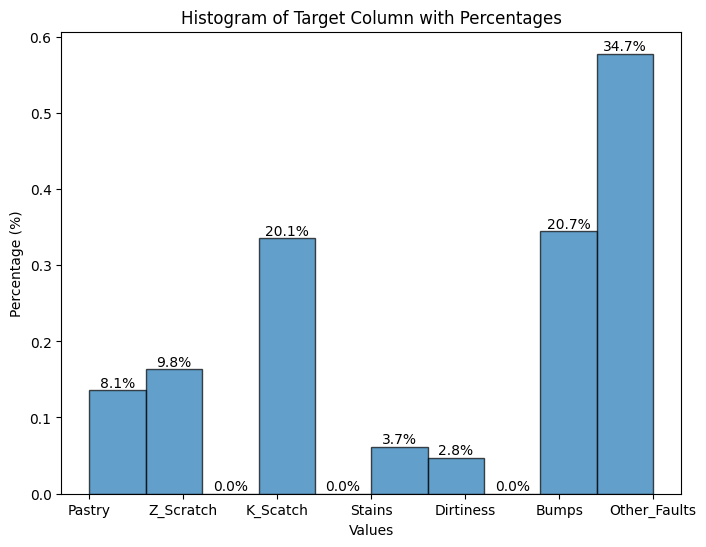

In [ ]:
# Plot a histogram with percentage labels
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(df_reduced['target_columns'], bins=10, edgecolor='black', alpha=0.7, density=True)  # Normalized histogram

# Convert counts to percentages
total = sum(counts)
percentages = [(c / total) * 100 for c in counts]

# Annotate the histogram bars with percentages
for patch, percentage in zip(patches, percentages):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Values')
plt.ylabel('Percentage (%)')
plt.title('Histogram of Target Column with Percentages')
plt.show()
